**If you use good browser (not IE), you can open this notebook in interactive mode and change everything here.**

Try this link [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikita-p/notebooks/master)

In [1]:
//create a window (critical for jupyter, ROOT does this automatically often)
TCanvas *c = new TCanvas("can", "Canvas", 900, 700);
                        //inner name, title, width, height

# Histograms

How to use:
* statistics block
* draw options

In [2]:
//create new 1D histogram
TH1D *hh = new TH1D("hh","",100,-3,3);
                    //inner name, title of the histogram, number of bins, minimum, maximum

In [3]:
//create new 2D histogram
TH2D h2d("h2d","",10,-3,3,10,0,300);
        //inner name, title of the histogram, number of bins (x axis), minimum, maximum, the same for (y axis) 

In [4]:
hh->FillRandom("gaus"); //fill 1D histogram with the gaussian distribution, default: 5000 values

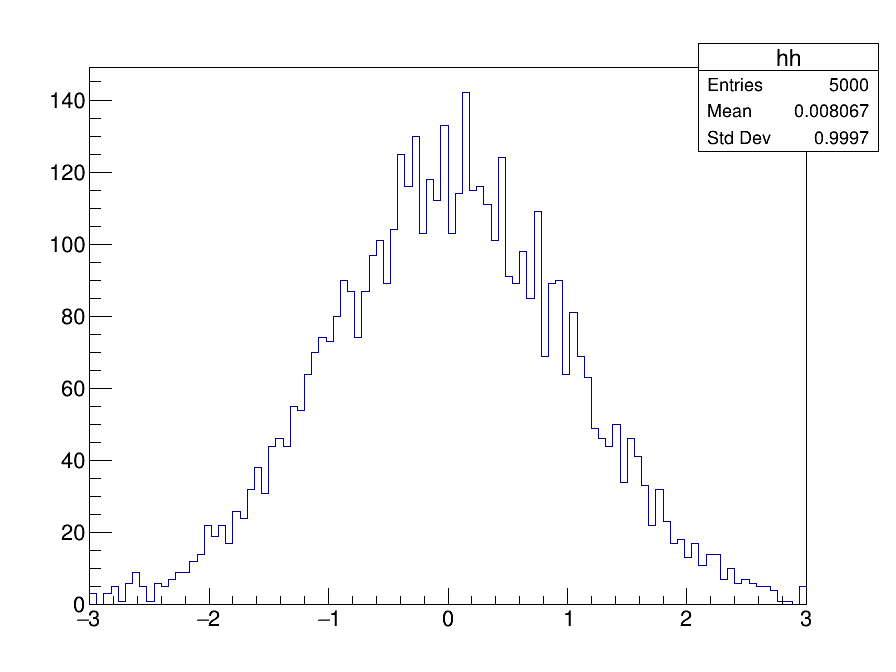

In [5]:
hh->Draw(""); //draw this histogram
c->Draw(); //draw window for this histogram (critical for jupyter, ROOT does this automatically)

**Statistics block**

How to change types of information:
```c++
gStyle->SetOptStat(0); //turn off this block
gStyle->SetOptStat(11); //print histogram name and number of entries
```
extra information about this method [there](https://root.cern.ch/doc/master/classTStyle.html#a0ae6f6044b6d7a32756d7e98bb210d6c)

**Drawing options**

We can change drawing style with options of `TH1::Draw()` method. 

Examples:
```c++
    h->Draw("ep"); //'e' - draw error bars, 'p' - use markers
    h->Draw("le"); //'l'- draw a line through the bin contents, 'e' - error bars
```

extra information about options [there](https://root.cern.ch/root/html534/guides/users-guide/Histograms.html#draw-options)

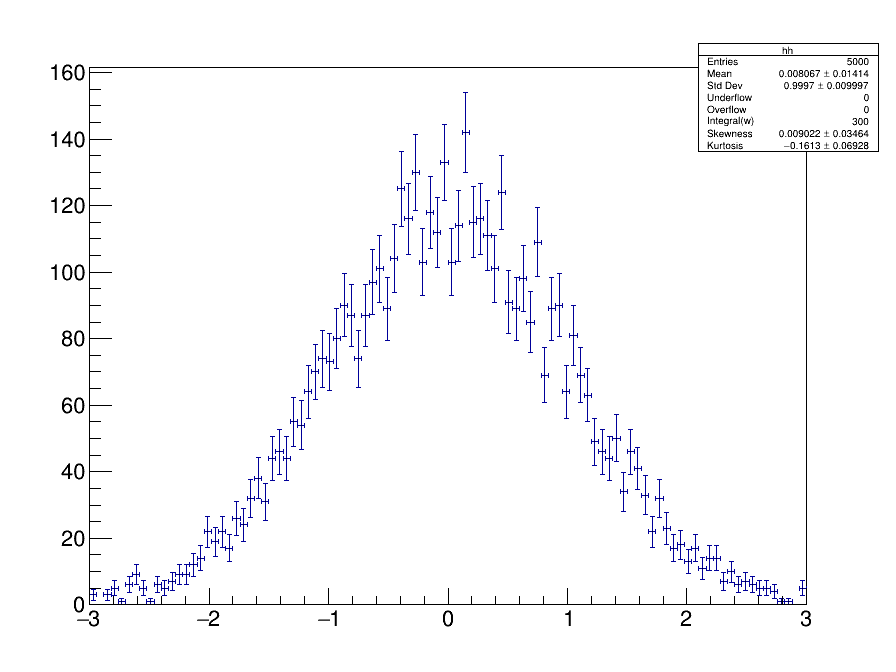

In [6]:
gStyle->SetOptStat(222112211);
//we can change the global variable "gStyle" according to some rules 
//to get the necessary parameters in the statistic window (top right)
hh->Draw("e1p");
//we can send to Draw method some keys to get other view
c->Draw(); //draw window (again)

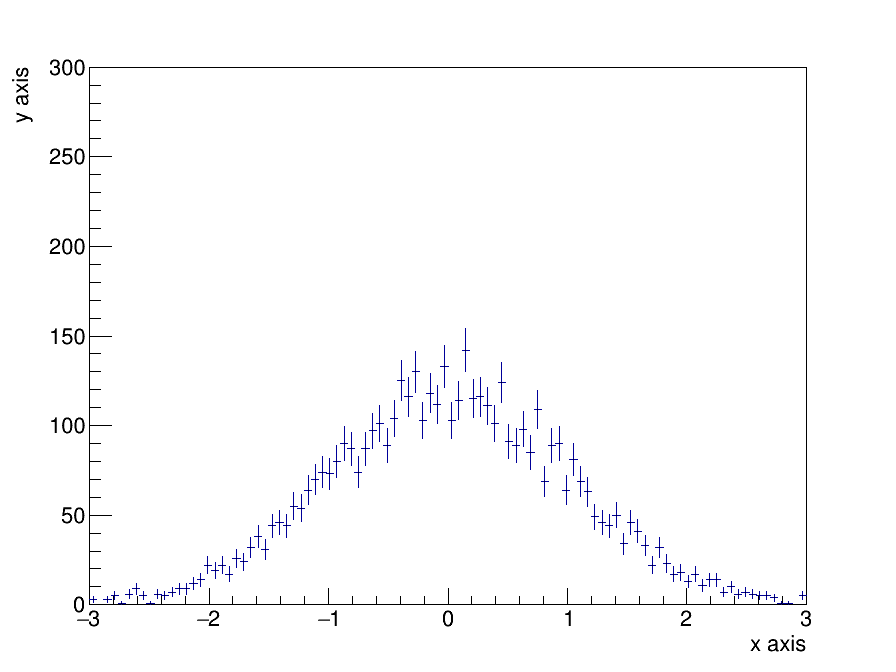

In [7]:
gStyle->SetOptStat(0); //turn off the statistical block
h2d.Draw("axis"); //draw only axis of the 2D histogram
h2d.SetXTitle("x axis"); //name x axis
h2d.SetYTitle("y axis"); //name y axis
hh->Draw("same ep"); //"same" means draw in the same borders (for this, it means to draw hh content in h2d borders)
c->Draw();

---------------------

## Add, fit and errors

How to:
* add histograms
* save right errors
* normalize histograms
* fit histograms
* divide histograms

In [8]:
TH1D hh1("hh1","Signal",100,0,10);
TH1D hh2("hh2","Background",100,0,10);
TH1D hh3("hh3","Data",100,0,10);

TF1 f1("func_sig","TMath::Gaus(x,5,0.3)"); //this is a function (we will study them on the next week in detail)
        //inner name, definition of the function (there gauss with mean of 5 and width of 0.3)
TF1 f2("func_bkg","TMath::Gaus(x,0,3)");  //another function
TF1 f3("func_data","2*TMath::Gaus(x,0,3,true)+0.1*TMath::Gaus(x,5,0.3,true)"); //and the function again

In [9]:
hh2.FillRandom("func_bkg",10000); //fill our histograms with random data distributed according to "func_bkg", 10000 times
hh3.FillRandom("func_data",11000); //data distributed according to "func_data", 11000 times
//you can see that there we use inner name of function

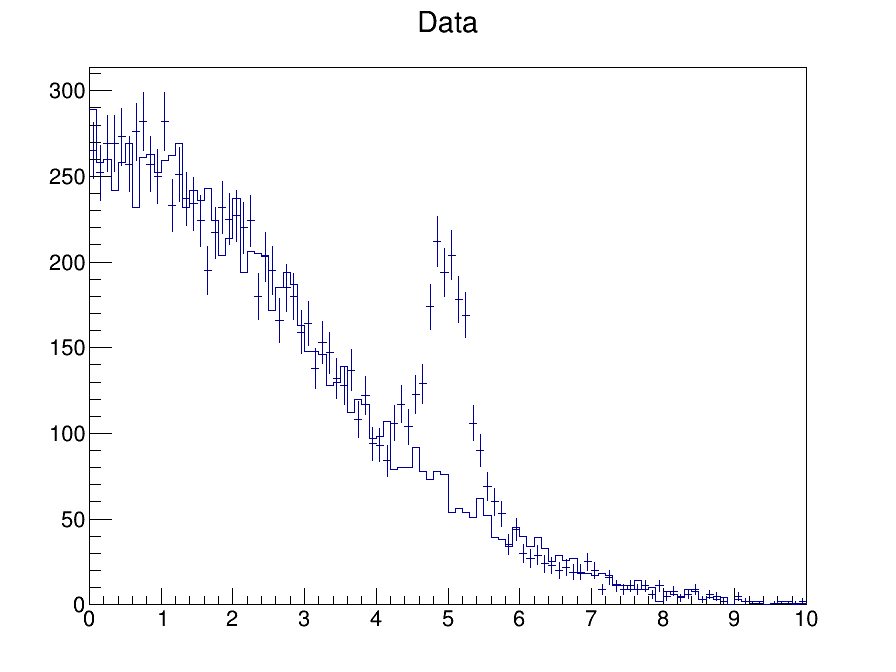

In [10]:
hh3.Draw("ep"); //e - draw error bars, p - data looks like points
hh2.Draw("same"); // draw hh2 in the same borders
c->Draw();

you can see there a signal + background, and we want to get rid of background

### About Add

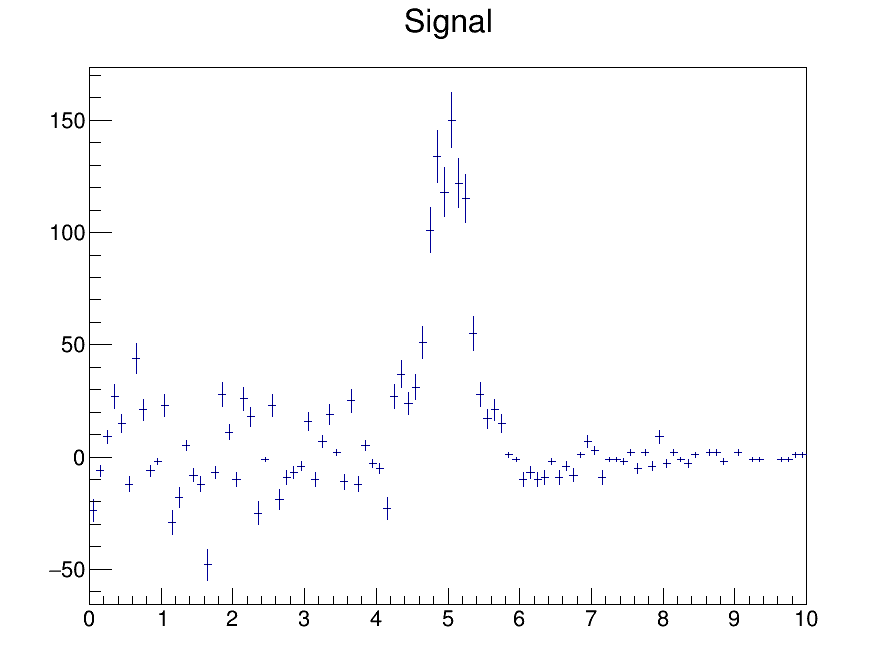

In [11]:
hh1.Add(&hh3,&hh2,1,-1); // that means hh1 = 1*hh3 + (-1)*hh2
hh1.Draw("ep"); //error bars + data points
c->Draw();

we have a trouble: incorrect error bars

Let's fix it

### About Sumw2()

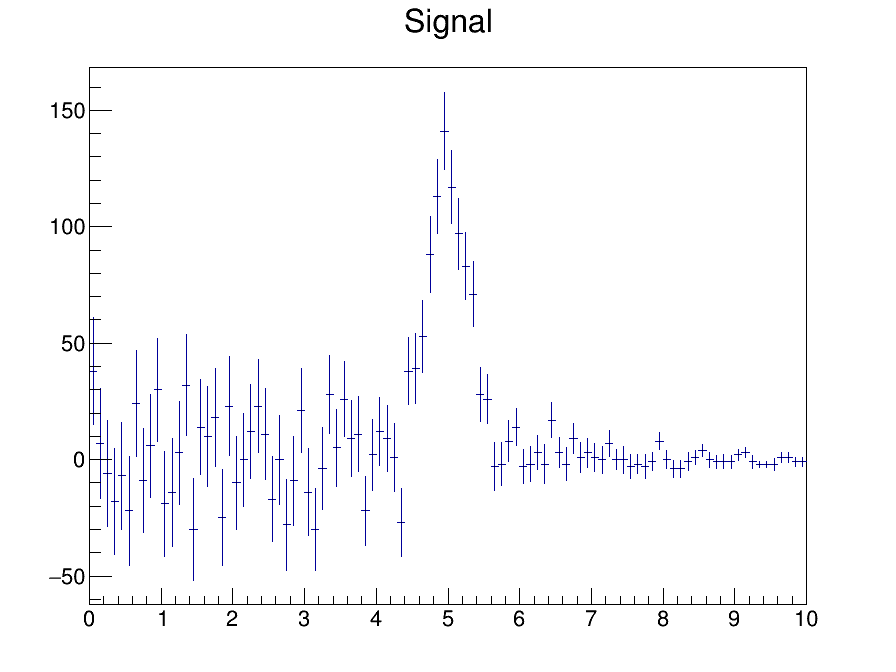

In [12]:
hh2.Reset(); hh3.Reset(); //clear histograms

////////////////////
hh2.Sumw2(); //save errors of the histogram
hh3.Sumw2();
///////////////////

//and do the procedure of subtraction again
hh2.FillRandom("func_bkg",10000); 
hh3.FillRandom("func_data",11000);
hh1.Add(&hh3,&hh2,1,-1);
hh1.Draw("ep");
c->Draw();

that is good, error bars are right

### About Scale

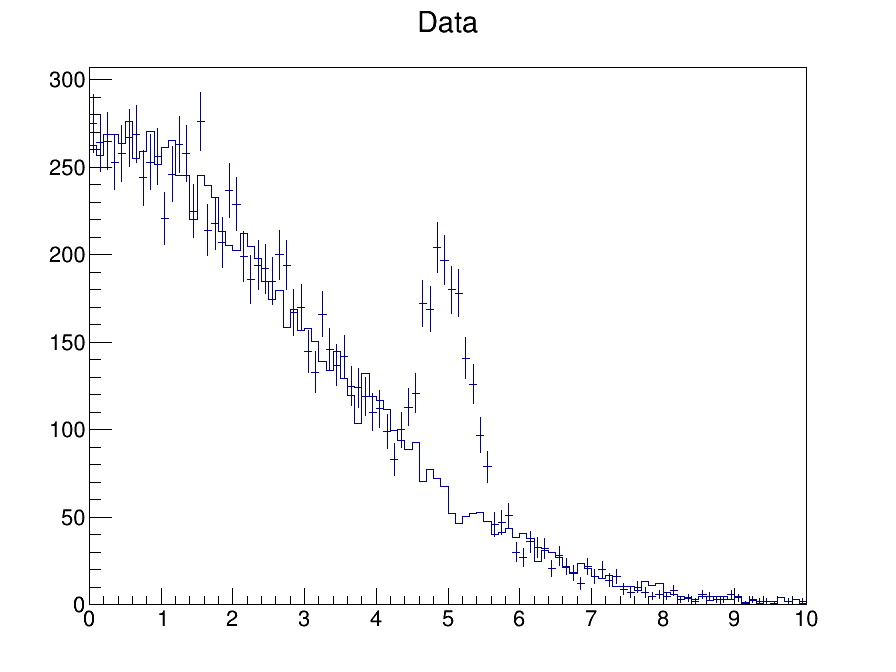

In [13]:
hh2.Reset(); hh3.Reset();

hh2.FillRandom("func_bkg",20000); // it was calculated two times more of background events
hh3.FillRandom("func_data",11000);

/////////////////
hh2.Scale(0.5);   // it is needed to normalize the histogram
////////////////

hh3.Draw("ep");
hh2.Draw("same hist");
c->Draw();

## Fit [(extra info)](https://root.cern.ch/root/htmldoc/guides/users-guide/FittingHistograms.html)

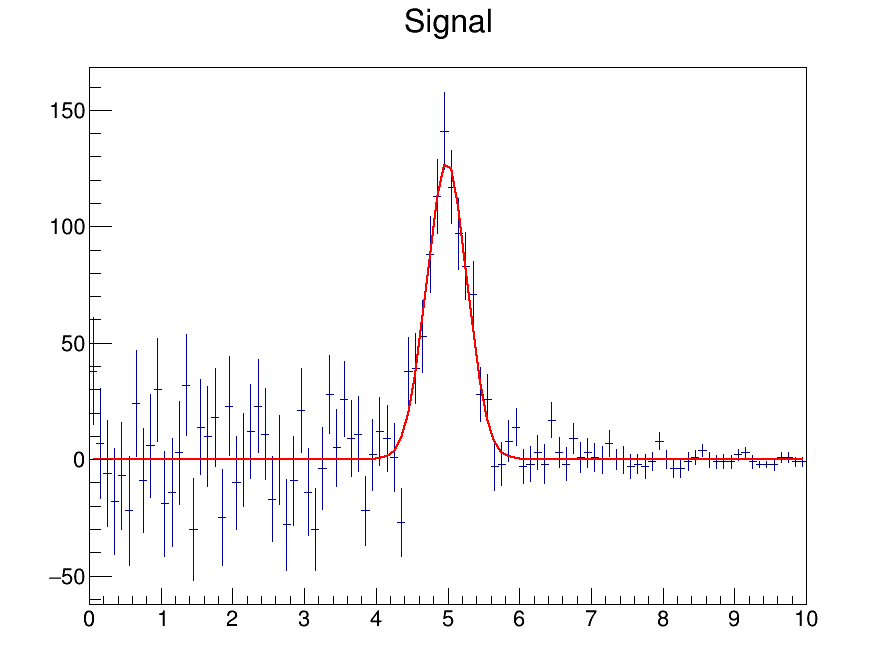

 FCN=82.9579 FROM MIGRAD    STATUS=CONVERGED     120 CALLS         121 TOTAL
                     EDM=1.63137e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.27642e+02   8.48158e+00   3.11544e-02  -6.28227e-06
   2  Mean         4.99282e+00   2.01768e-02   8.95631e-05  -1.82787e-03
   3  Sigma        2.78952e-01   1.83646e-02   4.12916e-05  -1.52956e-03


In [14]:
hh1.Fit("gaus");
c->Draw();

### Divide

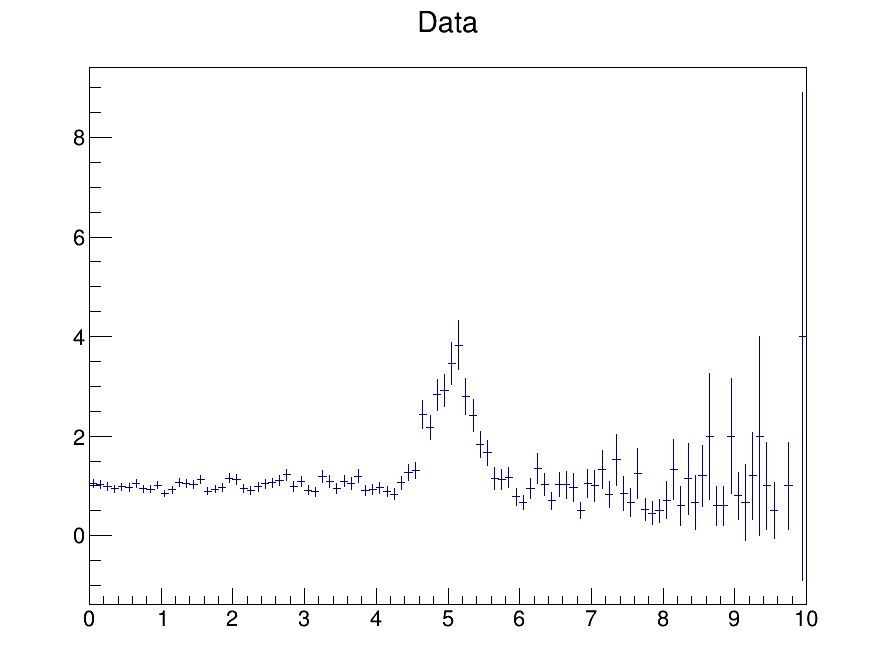

In [15]:
hh3.Divide(&hh2); //ROOT remembers about Sumw2() and still saves errors
hh3.Draw("ep");
c->Draw();

-----------------
## Weighted histograms

In [16]:
TH1D hwei("hwei","Histogram with weighted entries",100,-3,3.);
double xw,wei;

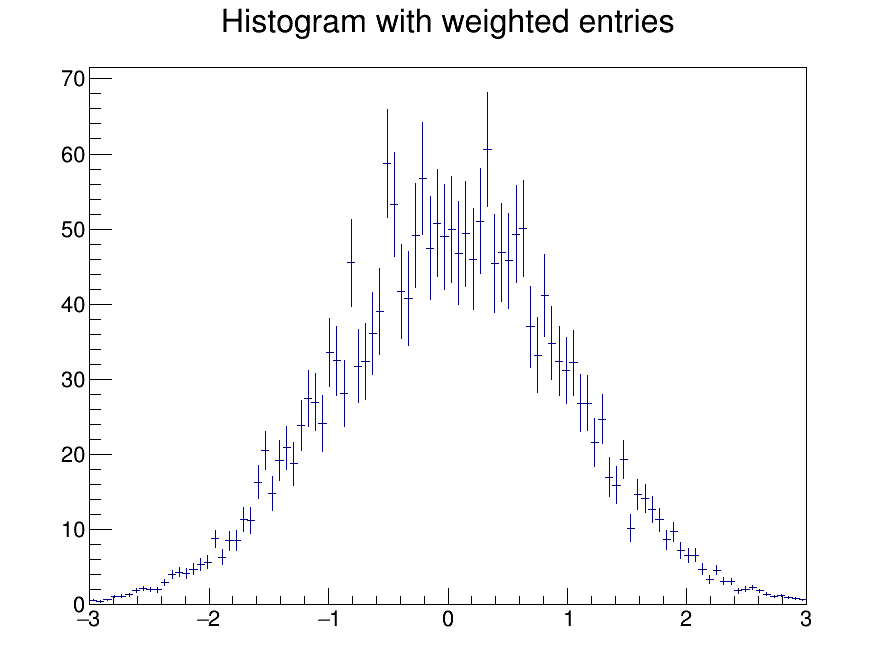

In [17]:
hwei.Sumw2();
for(int i=0;i<5000;i++){
    xw = gRandom->Uniform(-3,3);
    wei = TMath::Gaus(xw,0,1);
    hwei.Fill(xw,wei);
}
hwei.Draw("ep");
c->Draw();

----------------------
## 2D histograms

In [18]:
TH2D hist("hist","2d histogram",50,0.,10.,50,0.,10.); //the standard constructor for 2D histogram
double x,y; //define 2 variables

In [19]:
//Fill our 2D histogram
for(int i=0;i<1000000;i++){
    x = gRandom->Gaus(7,1);
    y = gRandom->Gaus(0,3);
    hist.Fill((x+y)/sqrt(2),(x-y)/sqrt(2));
}

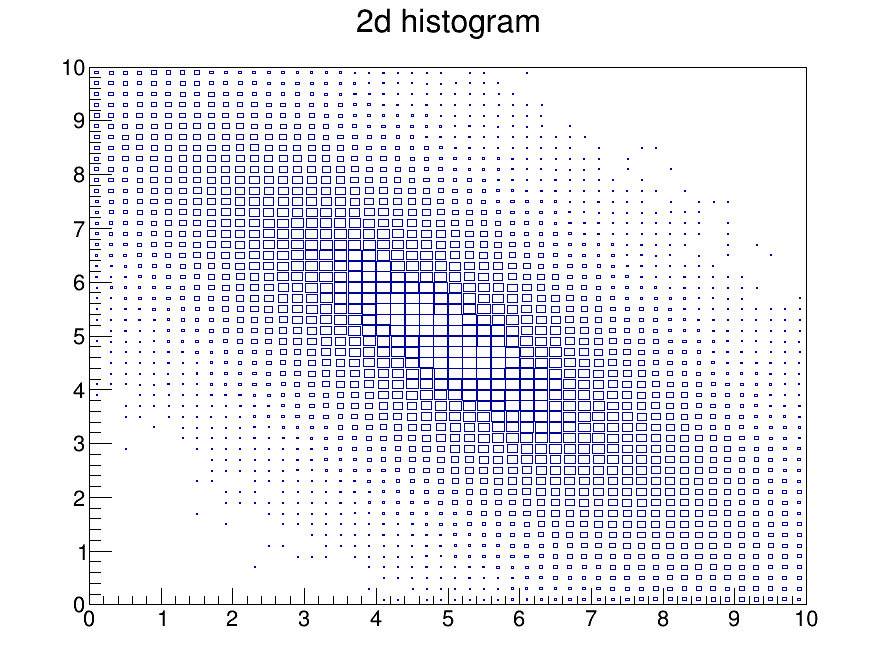

In [20]:
hist.Draw("box"); //"box" - Draw a box for each cell with surface proportional to contents
c->Draw();

-----------------------
## Profiles
Profile histograms are used to display the mean value of Y and its error for each bin in X.

[Extra info](https://root.cern.ch/doc/master/classTProfile.html)

In [21]:
TProfile pr("pr","Profile Y vs X",100,-3.,3.,""); // "s" - use RMS as an error
TH2D hpr("hpr","Didtribution Y vs X",100,-3,3,100,-3,3);
double xx,yy;
TCanvas c2("c2","c2",800,800);
c2.Divide(1,2); //split canvas into two parts

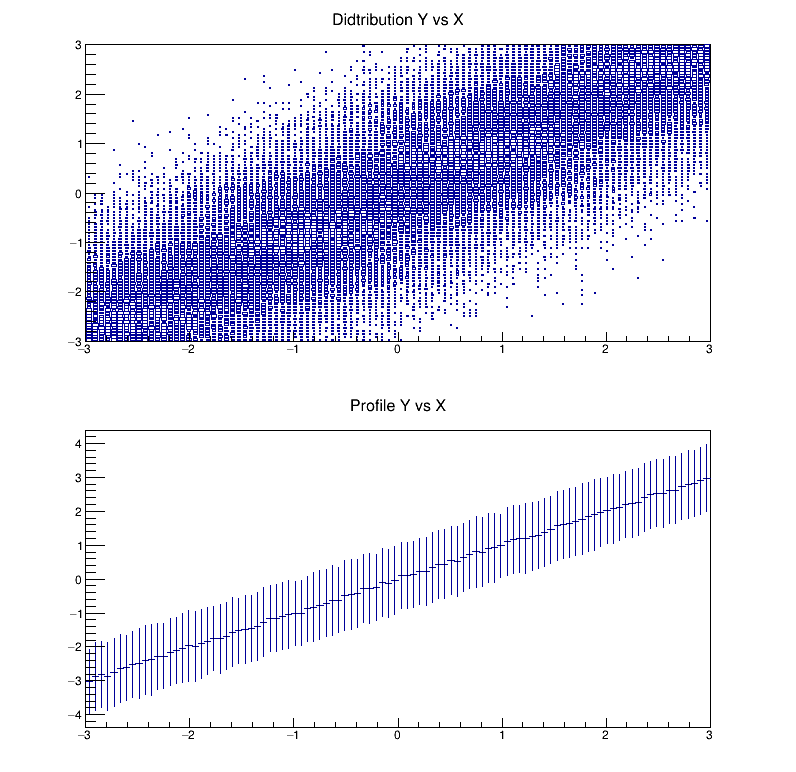

In [22]:
pr.Reset(); hpr.Reset();
pr.BuildOptions(0,0,"s");// "s" - use RMS as an error, "i" - use standard error on the mean

for(int i=0;i<100000;i++){
    xx = gRandom->Uniform(-3,3);
    yy = gRandom->Gaus(xx,1);
    pr.Fill(xx,yy);
    hpr.Fill(xx,yy);
}
c2.cd(1);
hpr.Draw("box"); 
c2.cd(2);
pr.Draw("");
c2.Draw();

---------------------
That's all. Good bye :)